# Actividad 3 Percepción Computacional: Segmentación

## Introducción
La segmentación consiste en dividir una determinada imagen en regiones/segmentos de propiedades similares. Estas propiedades pueden venir definidas por:
1.	El color.
2.	La textura.
3.	Los Contornos.

## Objeto
El objeto de esta práctica es sentar las bases para la detección de los defectos más básicos en la cara de los tableros de forma **No Supervisada**, así como reconocer algunos de ellos.

Se trata de identificar defectos reales en la cara de tableros contrachapados de madera. Podrían ser nudos, propios de la madera, grietas de la cara que dejan al descubierto el interior del tablero, o fallos de lijado tanto por exceso como por defecto, así como otros donde serían necesarios técnicas de iluminación para reconocer ciertos patrones de lijado que merecerán nuestra atención en trabajos futuros.

Existe una gran variedad de tipos y tonalidades de madera que pueden usarse en la cara de los tableros contrachapados. Pensemos que atendiendo únicamente a la especie, sin tener en cuenta variedades, ni acabados, habitualmente se puede trabajar con chopo, pino, okume, calabó, fromager, roble, haya, entre otras, con lo que una aplicación generalista puede no tener éxito.

Más tarde, en otro trabajo más pormenorizado, que serán las prácticas en empresa y TFM, se tratará una solución integral con el nivel de detalle necesario para poder tomar las acciones oportunas, la más importante desechar el material defectuoso en base a unas premisas de dimensiones y cuantificación de defectos, básicamente.

## 1ª PARTE: Exploración de soluciones


In [1]:
# Librerías requeridas
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import distance_transform_edt
import numpy as np
import matplotlib.pylab as plt
import cv2

In [2]:
"""
#ejecutar para Google Colab
from google.colab import files
input_im = files.upload()

imagen_1 =imread('nudo_desprendido.jpg')
imagen_2 =imread('grietas_nudos.jpg')
imagen_3 =imread('cara_comida.jpg')
"""

#Para ejecución local con Jupyter de Anaconda p.ej.
imagen_1 =imread('images/nudo_desprendido.jpg')
imagen_2 =imread('images/grietas_nudos.jpg')
imagen_3 =imread('images/cara_comida.jpg')

Saving cara_comida.jpg to cara_comida (2).jpg
Saving grietas_nudos.jpg to grietas_nudos (2).jpg
Saving nudo_desprendido.jpg to nudo_desprendido (2).jpg


Text(0.5, 1.0, 'Cara_comida')

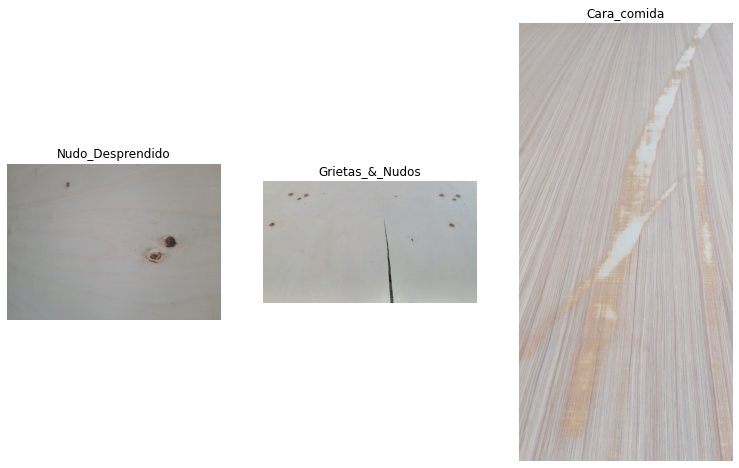

In [3]:
#Visualizamos las imágenes para comprobar que son las correctas
plt.figure(figsize=(13,13))

plt.subplot(131), plt.imshow(imagen_1)
plt.axis('off'),
plt.title('Nudo_Desprendido', size=12)

plt.subplot(132), plt.imshow(imagen_2),
plt.axis('off')
plt.title('Grietas_&_Nudos', size=12)

plt.subplot(133), plt.imshow(imagen_3),
plt.axis('off')
plt.title('Cara_comida', size=12)

Text(0.5, 1.0, 'Cara_comida')

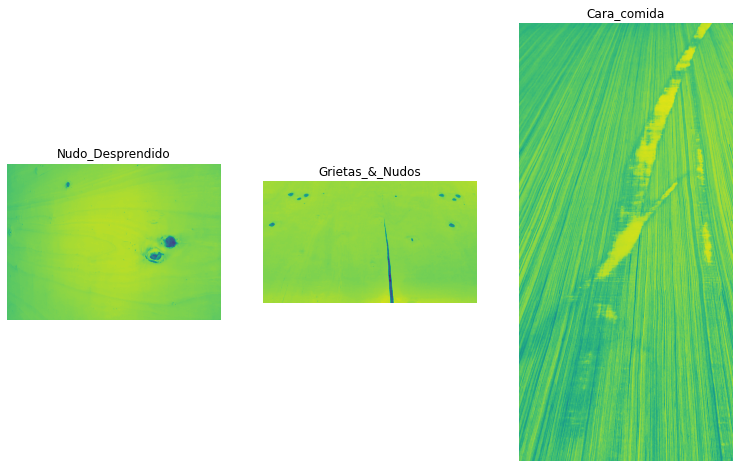

In [4]:
#las convertimos a escala de grises
image1_gray = rgb2gray(imagen_1)
image2_gray = rgb2gray(imagen_2)
image3_gray = rgb2gray(imagen_3)

plt.figure(figsize=(13,13))

plt.subplot(131), plt.imshow(image1_gray)
plt.axis('off'),
plt.title('Nudo_Desprendido', size=12)

plt.subplot(132), plt.imshow(image2_gray),
plt.axis('off')
plt.title('Grietas_&_Nudos', size=12)

plt.subplot(133), plt.imshow(image3_gray),
plt.axis('off')
plt.title('Cara_comida', size=12)

### 1.1. Binarización a partir de *Thresholding*
Buscamos convertir toda la imagen, salvo los defectos, a *background*, así nuestro *foreground* serán los defectos para que en etapas posteriores poder extraer caracteristicas de ellos que nos permitan la toma de decisiones.

Esta técnica es la más básica de segmentación, ya que no tiene en cuenta vecindades ni ningún tipo de correlación. En su vertiente más sencilla, por debajo de cierto nivel intensidad pasaremos a sobreescribir esos píxeles con un 0 de intensidad (negro), y por encima lo haremos con un 255 (blanco).

Para esto en ocasiones se suele utilizar el histograma, buscando "seccionarlo" por un "valle" que marque esa separación que se convertirá en *background* y *foreground*. 

En este sentido, es muy común utilizar el método de **Otsu** para encontrar un buen umbral de diferenciación, de forma que la dispersión dentro de cada segmento sea lo más pequeña posible, pero al mismo tiempo la dispersión sea lo más alta posible entre *foreground* y *background* .

In [20]:
# Obtain the optimal threshold value with otsu
thresh1 = threshold_otsu(image1_gray)
thresh2 = threshold_otsu(image2_gray)
thresh3 = threshold_otsu(image3_gray)

# Apply thresholding to the images in grayscale
binary1 = image1_gray > thresh1
binary2 = image2_gray > thresh2
binary3 = image3_gray > thresh3

Veamos los resultados para cada una de las imágenes, incluyendo su histograma y el nivel de umbralización elegido por el método de Otsu.

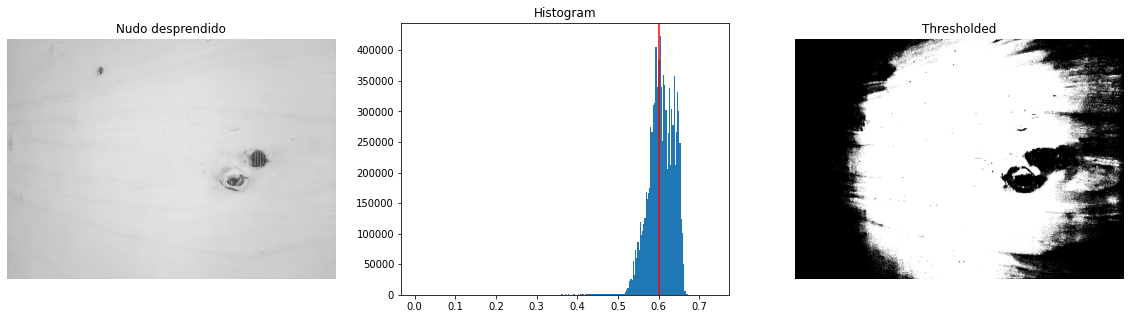

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image1_gray, cmap=plt.cm.gray)
ax[0].set_title('Nudo desprendido')
ax[0].axis('off')

ax[1].hist(image1_gray.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh1, color='r')

ax[2].imshow(binary1, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

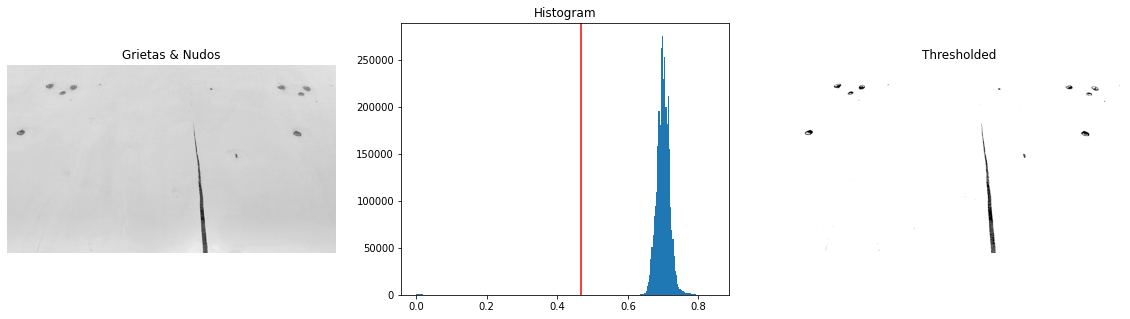

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image2_gray, cmap=plt.cm.gray)
ax[0].set_title('Grietas & Nudos')
ax[0].axis('off')

ax[1].hist(image2_gray.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh2, color='r')

ax[2].imshow(binary2, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

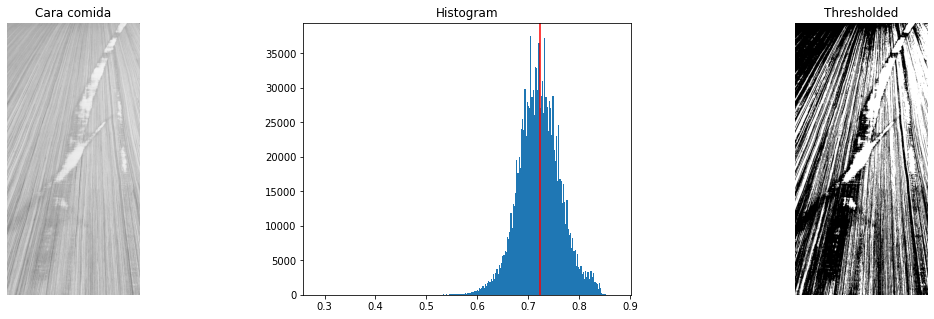

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image3_gray, cmap=plt.cm.gray)
ax[0].set_title('Cara comida')
ax[0].axis('off')

ax[1].hist(image3_gray.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh3, color='r')

ax[2].imshow(binary3, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

*Thresholdong* mediante Otsu ha presentado dificultades por dos motivos en sendas imágenes:
- En la primera imagen debido a la sobreexposición.
- En la tercera imagen no existe diferencia entre *foreground*, defectos, y *background*. Es como si fuese un emborronamiento, lo que hace que tengamos una distribución normal.

Por último, el nivel de segmentación que buscamos es el de la segunda imagen, donde se aprecian dos de los defectos más habituales, grietas y nudos, perfectamente.

En ocasiones se pueden chequear de una sola vez los métodos de *thresholding*, para toda la imagen, más populares para comparar resultados.

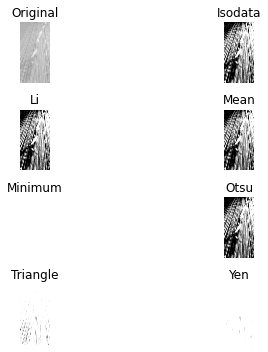

In [9]:
# Import the try all function
from skimage.filters import try_all_threshold

# Use the try all method on the grayscale image
fig, ax = try_all_threshold(image3_gray, verbose=False)
# Show the resulting plots
plt.show()

Ninguno de los métodos de umbralización es capaz de obtener resultados esperanzadores para la imagen última, que representará el reto para este tipo de detección.

### 1.2. k-Means 
A continuación probamos la efectividad del popular **k-means** que en el caso de *skimage* realiza una segmentación basada en color para el espacio (x,y,z).

Analizaremos las dos imágenes con mejor exposición, dejando la imágen sobreexpuesta para la 2ª parte de la actividad.

Text(0.5, 1.0, 'Segmentado k-means')

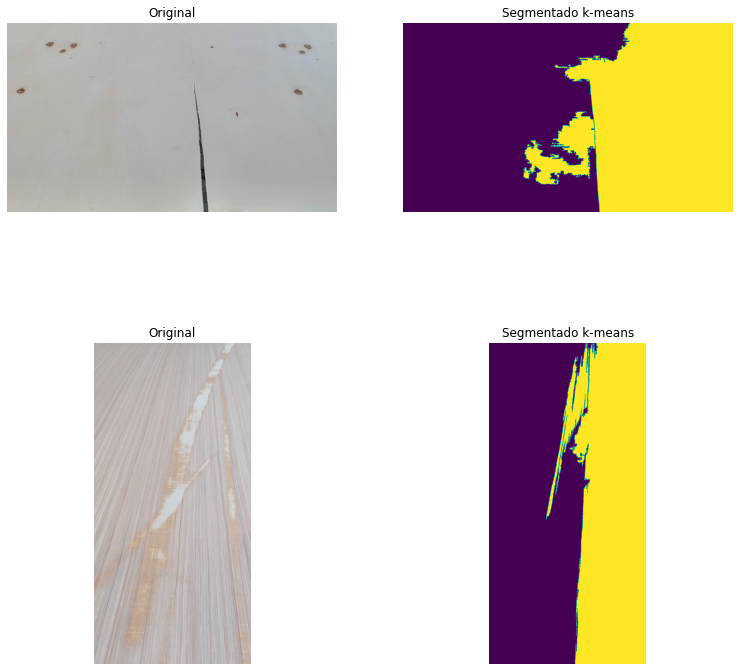

In [10]:
from skimage.segmentation import slic

segments2 = slic(imagen_2, n_segments=2, compactness=0.0001)
segments3 = slic(imagen_3, n_segments=2, compactness=0.0001)

plt.figure(figsize=(13,13))

plt.subplot(221), plt.imshow(imagen_2)
plt.axis('off'),
plt.title('Original', size=12)

plt.subplot(222), plt.imshow(segments2)
plt.axis('off'),
plt.title('Segmentado k-means', size=12)

plt.subplot(223), plt.imshow(imagen_3)
plt.axis('off'),
plt.title('Original', size=12)

plt.subplot(224), plt.imshow(segments3)
plt.axis('off'),
plt.title('Segmentado k-means', size=12)



El resultado tampoco es bueno ni se podría pensar que pueda resolver el problema.

### 1.3. Chan-Vese
Según la información ofrecida por scikit-image, el algoritmo de segmentación de Chan-Vese está diseñado para segmentar objetos sin límites claramente definidos.

Este algoritmo trabaja directamente sobre la imagen en escala de grises. Se basa en conjuntos de niveles que se desarrollan de forma iterativa para minimizar una energía, que se define mediante valores ponderados correspondientes a la suma de diferencias de intensidad del valor promedio fuera de la región segmentada, la suma de diferencias del valor promedio dentro de la región segmentada y un término que depende de la longitud del límite de la región segmentada.

En principio la definición podría encajar con nuestra segmentación. Porcedamos a la implementación y comprobación de resultados.

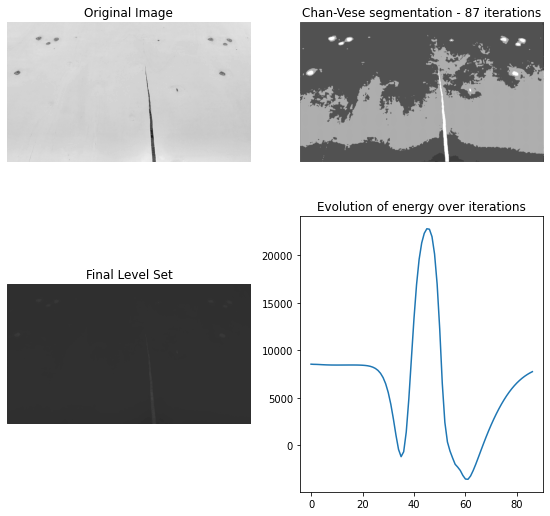

In [11]:
from skimage.segmentation import chan_vese
from skimage import img_as_float

#Imagen_2 Grietas & Nudos
cv = chan_vese(image2_gray, mu=30, lambda1=1, lambda2=1, tol=0.00001, max_iter=100,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image2_gray, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

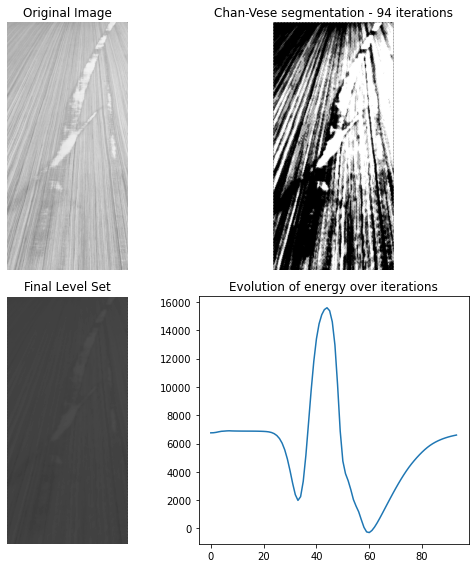

In [12]:
#Imagen_3 Cara_Comida
cv = chan_vese(image3_gray, mu=30, lambda1=1, lambda2=1, tol=0.00001, max_iter=100,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image3_gray, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()


*Chan-vese* tampoco resulelve nuestra problemática con la última imágen. Se han hecho multitud de pruebas con la esperanza de poder encontrar resultados, en concreto, hemos comprobado experimentalmente que:
- *mu* por debajo de 1 no resalta los defectos. A pesar de que los valores típicos para *mu* son 0 < *mu* < 1, teóricamente, los valores más altos están reservados para contornos muy mal definidos.

- nº de iteraciones a partir de 100 no mejoran los rsultados en el caso de ambas imágenes.

- Típicamente *lambda1* y *lambda2* son 1. En caso de tener un *background* claramente definido, se podría probar con otros valores. En este caso se ha probado a aumentar uno con respecto al otro en ambos sentidos y parecen jugar con el nivel de binarización de la salida.

- Tolerancias mayores muestran una segmentación muy pobre y hacen que el algoritmo se detenga en un menor número de iteraciones.

En general la sensibilidad de los parámetros es muy alta, trabajando con exponenciales de orden -3 a -5.

El algoritmo devuelve una lista de valores que se corresponden con la energía para cada iteración.


### 1.4. Watershed

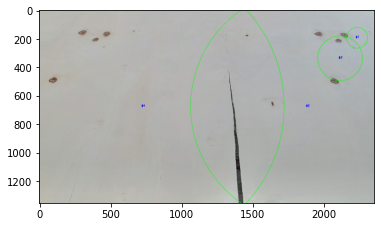

In [13]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
"""
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="path to input image")
args = vars(ap.parse_args())
"""
# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = imagen_2
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
plt.imshow(image)
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)

# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# show the output image
plt.imshow(image)

Watershed presemta sobre-segmentación para ciertas imágenes con mayor densidad de cambios en la imagen, y no obtiene buenos resultados para imágenes más sencillas, como en el caso anterior. 

### CONCLUSIONES Exploración de soluciones
1. Se ha podido apreciar que los algoritmos de segmentación no son válidos imágenes como la tercera imagen, el defecto es muy grande y apreciable para la percepción humana, pero no lo es tanto para algoritmos no supervisados que en este caso deberían reconocer un patrón, ya que las intensidades de la imagen son básicamente dos y se concentran en un rango pequeño del histograma.

2. Otsu no ha sido robusto a la sobreexposición de una de las imágenes, y esto nos ha hecho desconfiar de su rendimiento para un set real de miles de imágenes y una gran variedad de patrones de intensidades que pueden darse en las caras de los tableros por motivos naturales, o al ser tratados en el proceso de fabricación.

2. K-Means falla en el mismo sentido que el anterior, ya que k-means se basa en el color, y además presenta segmentación basada en centroides, lo que no se asemeja con algunos de nuestros defectos.

3. Chan-Vese, que en principio podía encajar con nuestra definición para defectos en la madera, realiza una sobresegmetnación que no somos capaces de corregir con sus parámetros.

4. Watershed también produce sobresegmentación, y entendemos que no es el mejor entorno para el algoritmo de inundación.

Una vez estudiados estos algoritmos, se concluye que no son válidos para la detección de ciertos defectos más relacioandos con la morfología que con el color. Este tipo de defectos quedarán para un estudio posterior mediante *deep learning*.

En este sentido, la entropía de la imágen también podría servirnos, pero queda fuera de esta actividad. En la Acitvidad_1 ya trabajamos con la entropía para comparar imágenes con ruido de imágenes filtradas; quizás en este caso nos podría servir de alguna utilidad la medición de la entropía.

## 2ª PARTE: Desarrollo del *Thresholding*

En esta segunda parte exploraremos más a fondo una solución. La escogida de todas las anteriores es **_Thresholding_** por los siguientes motivos:
- La sencillez, y a la vez control, de su parametrización. Esto, en un *set* más real con miles de imágenes, nos permitirá una parametrización más inteligente y dinámica en función de *features* que podamos extraer de la imagen a nivel de luminosidad, intensiad de color,...
- Computacionalmente es menos costosa, lo cual, nos benficiará en la toma de decisiones en timepo real, ya que esta solución trabajará con tableros en movimiento, y deben ser clasificados en un intervalo de tiempo, más o menos ajustado, tras la toma de la imágen oompleta, o su reconstrucción si usamos imágenes lineales.

Dentro de este método de umbralización, testearemos tres métodos:
1. *Simple Thresholding*.
2. *Adaptive thresholding*.
3. Otsu.

Únicamente tendremos en cuenta las dos imágenes que seremos capaces de segmentar sin *deep learning* y la "magia de las redes neuronales".



Text(0.5, 1.0, 'Grietas_&_Nudos')

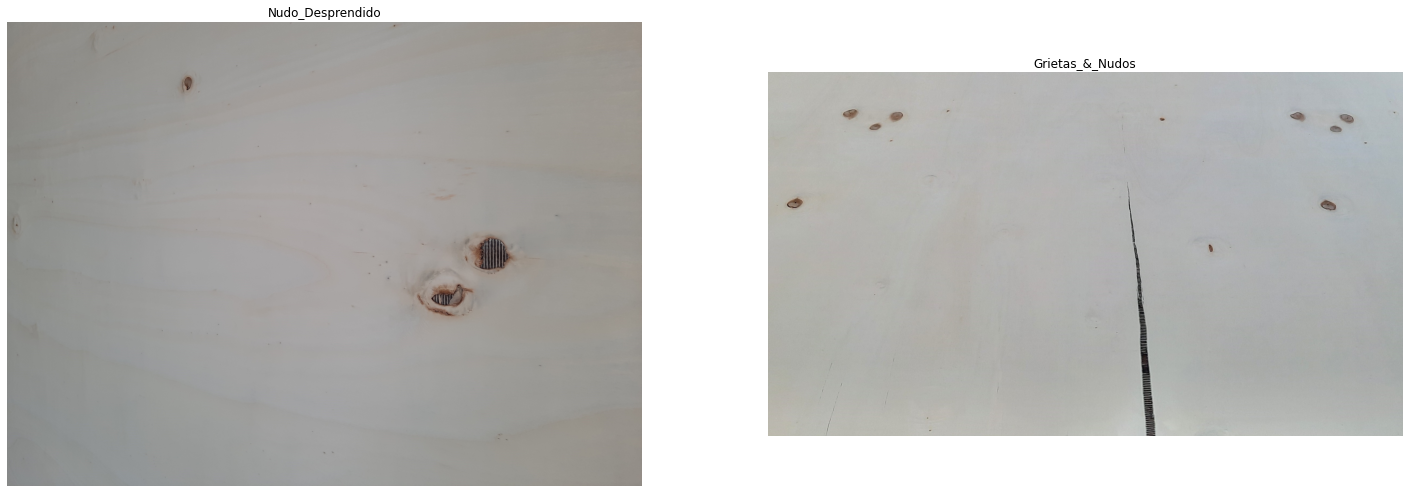

In [14]:
#Volvemos a inicializar la carga de imágenes 
imagen_1 =imread('nudo_desprendido.jpg')
imagen_2 =imread('grietas_nudos.jpg')

#y su visualización en un fomrato mayor para poder apreciar mejor los detalles de las imágenes 
plt.figure(figsize=(25,25))

plt.subplot(121), plt.imshow(imagen_1)
plt.axis('off'),
plt.title('Nudo_Desprendido', size=12)

plt.subplot(122), plt.imshow(imagen_2),
plt.axis('off')
plt.title('Grietas_&_Nudos', size=12)

### 2.1 Simple Thresholding (cv2.threshold). 
La implementación hecha es típica, si el valor de píxel es mayor que un valor umbral, pasará a ser blanco, de lo contrario pasará a ser negro. Tras esto invertiremos la salida mediante cv2.THRESH_BINARY_INV, ya que nuestro *foreground* serán los defectos, zonas más oscuras de las imágenes, en principio.

La salida del algoritmo son dos, primero un *retval*, y segundo la imágen umbralizada.

Text(0.5, 1.0, 'Nivel Umbral = 127.557')

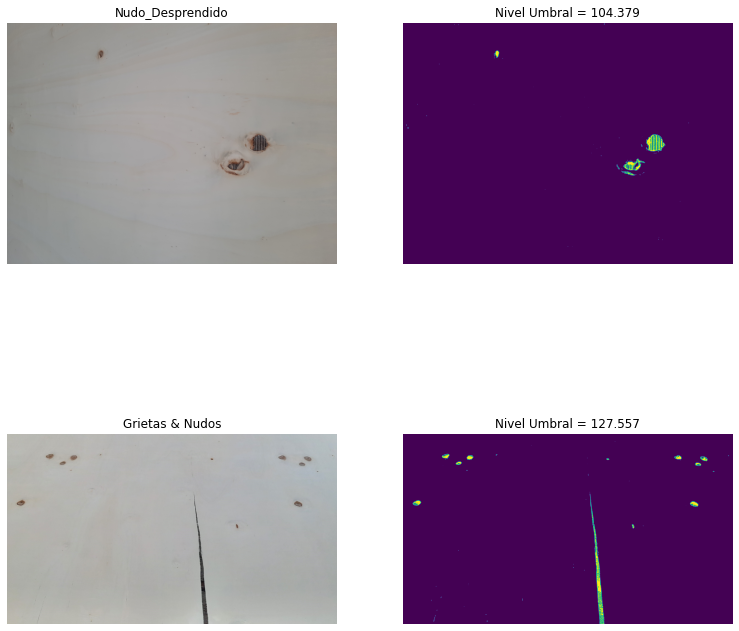

In [15]:
img1 = cv2.imread('nudo_desprendido.jpg',0) # el 0 especifica en escala de grises
img2 = cv2.imread('grietas_nudos.jpg',0)

av_im1 = img1.mean(axis=0).mean(axis=0) #media de los pixeles de la imagen
av_im2 = img2.mean(axis=0).mean(axis=0)

th_im1 = av_im1-50 # En función de dónde queramos establecer el nivel de umbralización podemos jugar con ese offset (50)
ret1,thresh1 = cv2.threshold(img1,th_im1,255,cv2.THRESH_BINARY_INV)

th_im2 = av_im2-50
ret2,thresh2 = cv2.threshold(img2,th_im2,255,cv2.THRESH_BINARY_INV)

# print(av_im1)

plt.figure(figsize=(13,13))

plt.subplot(221), plt.imshow(imagen_1)
plt.axis('off'),
plt.title('Nudo_Desprendido', size=12)

plt.subplot(222), plt.imshow(thresh1),
plt.axis('off')
plt.title('Nivel Umbral = %1.3f' %th_im1, size=12)

plt.subplot(223), plt.imshow(imagen_2)
plt.axis('off'),
plt.title('Grietas & Nudos', size=12)

plt.subplot(224), plt.imshow(thresh2),
plt.axis('off')
plt.title('Nivel Umbral = %1.3f' %th_im2, size=12)

Podemos observar como jugando con el nivel medio de las intensidades de los píxeles de las imágenes, podemos generar difrentes niveles de umbralización que se adapten a nuestras imágenes. 

En este caso además se ha añadido un offset negativo, para "meter" en el *background* mayor cantidad de imagen, y dar mayor fiabilidad a la umbralización del *foreground*.

Los resultados son muy buenos, y aunque no se aprecia con total claridad, incluso defectos mínimos son umbralizados debidamente, como los que aparecen en la parte inferior izquierda de la segunda imágen. 

### 2.2 Adaptive thresholding (cv2.adaptiveThreshold)
Podría suceder que tengamos una variabilidad cromática en una misma imágen muy alta, y el método anterior no resulte útil. Para este tipo de casos existe el *Adaptive Thresholding*.

Este algoritmo calcula el umbral para pequeñas regiones de la imagen, obteniendo así diferentes umbrales que se adaptan a la imagen.

Text(0.5, 1.0, 'Adaptive Gaussian Thresholding')

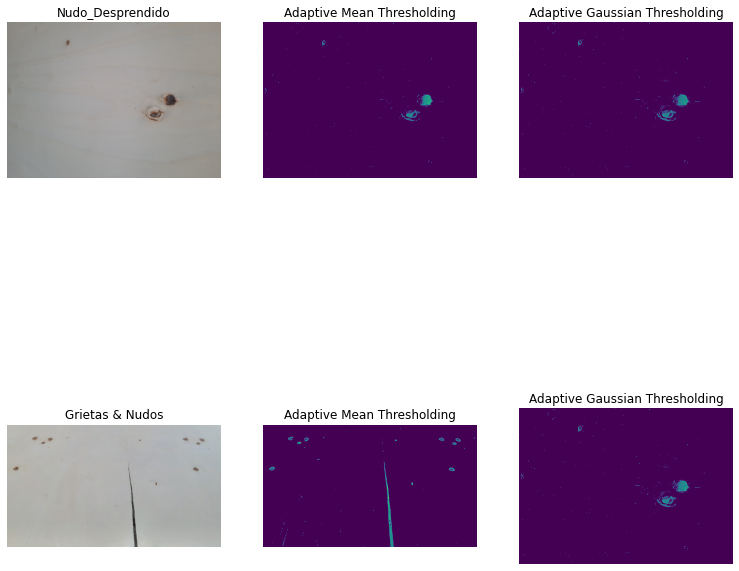

In [16]:
img1 = cv2.imread('nudo_desprendido.jpg',0) # el 0 especifica en escala de grises
img2 = cv2.imread('grietas_nudos.jpg',0)

img1 = cv2.medianBlur(img1,5)

th1_img1 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,5)
th2_img1 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

img2 = cv2.medianBlur(img2,5)
th1_img2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,5)
th2_img2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

plt.figure(figsize=(13,13))

plt.subplot(231), plt.imshow(imagen_1)
plt.axis('off'),
plt.title('Nudo_Desprendido', size=12)

plt.subplot(232), plt.imshow(th1_img1)
plt.axis('off')
plt.title('Adaptive Mean Thresholding', size=12)

plt.subplot(233), plt.imshow(th2_img1)
plt.axis('off'),
plt.title('Adaptive Gaussian Thresholding', size=12)

plt.subplot(234), plt.imshow(imagen_2)
plt.axis('off')
plt.title('Grietas & Nudos', size=12)

plt.subplot(235), plt.imshow(th1_img2)
plt.axis('off')
plt.title('Adaptive Mean Thresholding', size=12)

plt.subplot(236), plt.imshow(th2_img1)
plt.axis('off'),
plt.title('Adaptive Gaussian Thresholding', size=12)

En este algoritmo pasamos como parámetros la imágen en escala de grises, el nivel de umbralización, y el método utilizado para encontrar este nivel. Este algoritmo presenta dos métodos para umbralizar:
- cv2.ADAPTIVE_THRESH_MEAN_C : calcula el valor a partir de la media de la vecindad.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C : el valor es el resultado de la suma ponderada de la vecindad, donde esos pesos forman una distribución gausiana.

Por último tenemos el tamaño de la ventana que recorrerá la imagen, y una constante negativa que actuará sobre la media o los pesos calculados.

Con esta herramienta, para el caso del método de cálculo por media, el resalte de los defectos es el mayor visto hasta ahora, pero se debe experimentar y automatizar la elección del tamaño y el offset para evitar introudcir ruido en el resultado.

Por ejemplo si aumentásemos el tamaño de la ventatna (siempre números impares) a 33 y disminuimos el valor de la constante sustraendo, estaríamnos inroduciendo ruido en el método, que seccionará ciertas zonas más oscuras por la beta de la madera, como defectos, cuando realmente no lo son. 

### 2.3 Otsu (threshold_otsu)
Este método es el visto al inicio de la práctica, pero veámoslo algo más resumido para poder comparar más comodametne los resultados.


Text(0.5, 1.0, 'Otsu Thresholding')

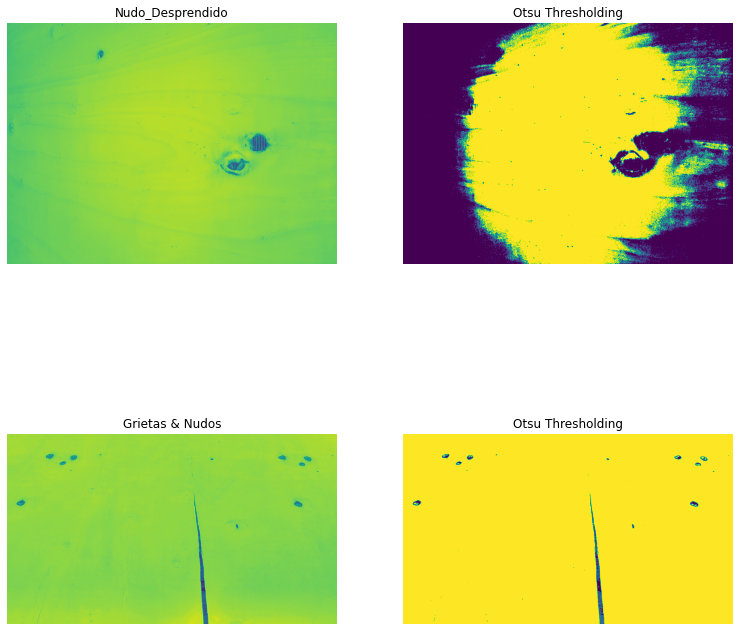

In [17]:
img1 = cv2.imread('nudo_desprendido.jpg',0) # el 0 especifica en escala de grises
img2 = cv2.imread('grietas_nudos.jpg',0)

# Obtain the optimal threshold value with otsu
thresh1 = threshold_otsu(img1)
thresh2 = threshold_otsu(img2)

# Apply thresholding to the images in grayscale
binary1 = img1 > thresh1
binary2 = img2 > thresh2

plt.figure(figsize=(13,13))

plt.subplot(221), plt.imshow(img1)
plt.axis('off'),
plt.title('Nudo_Desprendido', size=12)

plt.subplot(222), plt.imshow(binary1)
plt.axis('off')
plt.title('Otsu Thresholding', size=12)

plt.subplot(223), plt.imshow(img2)
plt.axis('off'),
plt.title('Grietas & Nudos', size=12)

plt.subplot(224), plt.imshow(binary2)
plt.axis('off')
plt.title('Otsu Thresholding', size=12)


### CONCLUSIONES *Thresholding* en Caras de Chopo

Salvo Otsu, tanto *Simple Thresholding*, como *Adaptive Thresholding*, este último en sus dos vertientes, han obtenido muy buenos resultados.

En esta práctica carecemos de un set de imágenes donde la variedad de especies, tonalidades, defectos, y otras variantes que pudieran influirnos en la segmentación, estén incluidas, y así poder evaluar una solución más integral.

Las imágenes, en la realidad serán tomadas sobre un fondo blanco que seguramente será una fuente lumínica. Esto habrá que tenerlo en cuenta para poder detectar el contorno y recortar la imágen. Para esta actividad este proceso se ha suprimido por dos motivos, la extensión, y que ya quedó resuelto en nuestra Actividad_2, que fue grupal.

En el futuro, deberemos contar con un set de imágenes.

El algoritmo *Adaptive Thresholding* presenta un mayor potencial por los soguientes motivos:
- Al recorrer la imagen con una ventana e ir umbralizando en base a ella, nos permite independizarnos de los cambios que se puedan producir en las imágenes en cuanto a intensidades.
- Ofrece la posibilidad de modificar el nivel de umbralización, para así actuar sobre él dándole mayor robustez para no incluir *background*, como pudieran ser betas oscuras de la madera, como *foreground*, los deefctos que se pretenden resaltar.

Parafraseando el Objeto de esta actividad: el objeto de esta práctica es sentar las bases para la detección de los defectos más básicos en la cara de los tableros de forma **No Supervisada**, así como reconocer algunos de ellos. Esto se ha conseguido y se facilitan las herramientas para trabajos futuros.

# BIBLIOGRAFÍA


https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_chan_vese.html?highlight=chan%20vese


https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html

https://www.pyimagesearch.com/2015/11/02/watershed-opencv/

https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

In [22]:
"""
Con set de imágenes habrá que automatizar las tareas, como por ejemplo el plot de resultados
for i in range(X):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show() 
"""

"\nCon set de imágenes habrá que automatizar las tareas, como por ejemplo el plot de resultados\nfor i in range(X):\n    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')\n    plt.title(titles[i])\n    plt.xticks([]),plt.yticks([])\nplt.show() \n"